In [22]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/2021.3.df.csv')

df = df[df['total_time'] > 0]  # user gave other player extra time

In [23]:
df.columns

Index(['total_time', 'move_num', 'move_num2', 'black_last_played', 'Event',
       'Site', 'WhiteElo', 'BlackElo', 'ECO', 'Opening', 'Termination',
       'TimeControl'],
      dtype='object')

In [19]:
tmp = df[df['TimeControl'] == '180+2']
tmp['cut'] = pd.cut(tmp['total_time'], bins=100, precision=0)
tmp2 = tmp.groupby('cut').cut.count()

In [24]:
# sns.countplot(data=tmp, x='total_time')

In [25]:
# for i, (key, _) in enumerate(Counter(df['TimeControl']).most_common(9)):
#     fig = plt.figure()
#     row = i // 9
#     col = i % 1
#     xmin, ymin, dx, dy = 0, 0, 1, 250
#     ax = fig.add_axes([xmin,ymin, dx, dy])
#     # ax = axs[row][col]
#     tmp = df[df['TimeControl'] == key]
#     tmp['cut'] = pd.cut(tmp['total_time'], bins=100, precision=0)
#     sns.countplot(data=tmp, x='total_time', ax=ax)
#     ax.set_xlim(0, 60 * 15)
#     # ax.xt

In [26]:
Counter(tmp['total_time']).most_common(5)

[(450, 254), (463, 246), (467, 241), (399, 239), (444, 238)]

In [196]:
chr(65)

'A'

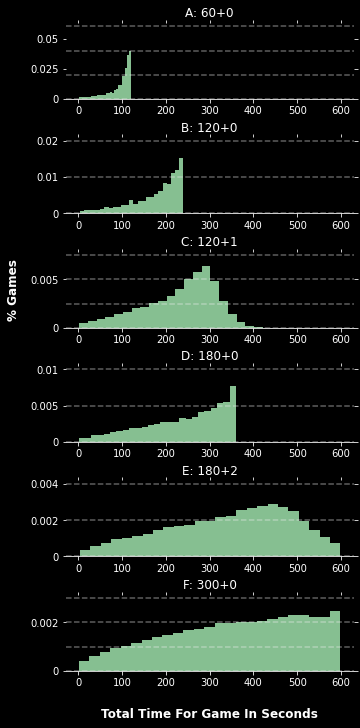

<Figure size 432x288 with 0 Axes>

In [206]:
from matplotlib.ticker import StrMethodFormatter
keys = [
    '60+0',
    '120+0',
    '120+1',
    '180+0',
    '180+2',
    '300+0'
]
tmp = df[df['TimeControl'].isin(keys)]
tmp = tmp[tmp['total_time'] < 600]
dict_apply = {x: f"{chr(65 + i)}: {x}" for i,x in enumerate(keys)}
tmp['TimeControl2'] = tmp['TimeControl'].apply(lambda x: dict_apply[x])
axes = tmp.hist(column='total_time', by='TimeControl2', 
                figsize=(5, 12), density=True, layout=(len(keys), 1), sharex=True, 
                color='#86bf91', bins=25)
plt.style.use('dark_background')
key_to_axes = {}
for i, x in enumerate(axes):
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks    
    x.tick_params(axis="both", which="both", bottom="off", top="off",
                  labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

#     Set x-axis label
    x.set_xlabel("Total Time For Game In Seconds", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 2:
        x.set_ylabel("% Games", labelpad=10, weight='bold', size=12, color='white')

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)
plt.show()
plt.savefig('totalTimeTakenForGames.png')